To make R work in notebook, see datacamp article https://www.datacamp.com/community/blog/jupyter-notebook-r 

## Packages to install

In [ ]:
install.packages("tm", repos = "http://cran.us.r-project.org") 
library(tm)

install.packages("ggraph", repos ='http://cran.us.r-project.org')
library(ggraph)

install.packages("wordcloud", repos ='http://cran.us.r-project.org') 
library(wordcloud)

install.packages("tidytext", repos ='http://cran.us.r-project.org') #download this to use tidy
library(tidytext)

install.packages("cluster", repos = "http://cran.us.r-project.org")
library(cluster)

## Create a corpus

In [178]:
#define the path of the document collection
cname <- file.path(".", "speech")
cname #check it's done it right
length(dir(cname)) #are the document number as expected?
dir(cname) #what are the names of these documents?
#now, turn this into a Corpus - collection of document. we use a simple corpus instead of a virtual one
buhariCorpus <- Corpus(DirSource(cname, encoding="UTF-8")) #use DirSource as documents are stored in file directories
#check data structure
str(buhariCorpus)
#summary of documents loaded
summary(buhariCorpus) #you can change the meta data by editing the summary

[1] "./speech"

[1] 47

[1] "inauguration" "Speech1"      "Speech10"     "Speech11"     "Speech12"    
 [6] "Speech13"     "Speech14"     "Speech15"     "Speech16"     "Speech17"    
[11] "Speech18"     "Speech19"     "Speech2"      "Speech20"     "Speech21"    
[16] "Speech22"     "Speech23"     "Speech24"     "Speech25"     "Speech26"    
[21] "Speech27"     "Speech28"     "Speech29"     "Speech3"      "Speech30"    
[26] "Speech31"     "Speech32"     "Speech33"     "Speech34"     "Speech35"    
[31] "Speech36"     "Speech37"     "Speech38"     "Speech39"     "Speech4"     
[36] "Speech40"     "Speech41"     "Speech42"     "Speech43"     "Speech44"    
[41] "Speech45"     "Speech46"     "Speech5"      "Speech6"      "Speech7"     
[46] "Speech8"      "Speech9"

List of 47
 $ inauguration:List of 2
  ..$ content: chr "I am immensely grateful to God for this day and for this hour. I feel<a0>truly honoured and humbled that the Ni"| __truncated__
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2018-08-14 13:43:03"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "inauguration"
  .. ..$ language     : chr "en"
  .. ..$ origin       : chr(0) 
  .. ..- attr(*, "class")= chr "TextDocumentMeta"
  ..- attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"
 $ Speech1     :List of 2
  ..$ content: chr " Protocols: I am honoured to be with you here today to celebrate the anniversary of this vital global instituti"| __truncated__
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2018-08-14 13:43:03"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "Speech1"


             Length Class             Mode
inauguration 2      PlainTextDocument list
Speech1      2      PlainTextDocument list
Speech10     2      PlainTextDocument list
Speech11     2      PlainTextDocument list
Speech12     2      PlainTextDocument list
Speech13     2      PlainTextDocument list
Speech14     2      PlainTextDocument list
Speech15     2      PlainTextDocument list
Speech16     2      PlainTextDocument list
Speech17     2      PlainTextDocument list
Speech18     2      PlainTextDocument list
Speech19     2      PlainTextDocument list
Speech2      2      PlainTextDocument list
Speech20     2      PlainTextDocument list
Speech21     2      PlainTextDocument list
Speech22     2      PlainTextDocument list
Speech23     2      PlainTextDocument list
Speech24     2      PlainTextDocument list
Speech25     2      PlainTextDocument list
Speech26     2      PlainTextDocument list
Speech27     2      PlainTextDocument list
Speech28     2      PlainTextDocument list
Speech29   

In [179]:
#review a document in the corpus
buhariCorpus[[46]]$content

[1] " PROTOCOLS It gives me great pleasure to welcome members of the International Press Institute (IPI) to Nigeria. It is the first time in the 68 years history of the media<92>s premier platform for press freedom that editors, media executives and leading journalists would gather in this country for its World Congress and General Assembly. Nigeria is most honoured to host you. Our country has a rich history of robust relationship with the IPI; prominent Nigerian journalists and media operators were and continue to be in the leadership of the international body. But perhaps the most significant symbol of this special relationship is the Nigeria Institute of Journalism, Ogba, Ikeja, Lagos established by IPI in 1963. It is our pride that your vision of a professional journalism training institution in Nigeria has taken firm root. Your annual congress is holding in Nigeria during a period of global terrorism. Nigeria experiences that scourge through Boko Haram, which has been technically degraded and has no territorial hold anywhere, anymore, in its northeast operational base. The Internally Displaced Persons are gradually returning to their communities in reasonable safety and security. It is a reflection of your assessment of Nigeria as a safe country that you gave the country the hosting right for this conference. As you have seen since your arrival, you made a wise and right choice. The changing media landscape, the explosion of the social media and the rapidly evolving new technology have had profound impact on media business and media practice. It is satisfying, therefore, that you have chosen an appropriate theme for your conference: Why Good Journalism Matters: Quality Media for Strong Societies. In a world where the borderline between hate speech and free speech has become blurred, good journalism matters. In an environment where fake news dwarfs investigative reporting, Good Journalism Matters. For survival in an increasingly competitive field, Good Journalism Matters. Good journalism promotes Good Governance. I therefore urge participants to give depth to the topic in your discussions and conclusions. One of the reform initiatives of this administration is the introduction of visa on arrival policy. The policy is designed to aid ease of doing business in Nigeria. I am glad that international delegates to this conference are beneficiaries of this policy. Nigerian government has provided necessary support for a successful hosting right from the time our delegation presented its hosting bid in Qatar to the granting of that right in Germany last year. I commend the efforts of the Nigeria Hosting Committee for organizing this conference. It is one more evidence of Nigeria<92>s capacity for doing great things. Welcome to Nigeria; and enjoy our famous hospitality.   "

## Clean up

In [180]:
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<91>", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<92>", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<93>", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<94>", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<95>", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<96>", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<97>", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<U+200B>", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<a0>", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "cross river", replacement="crossriver")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "etc", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<e9>", replacement=" ")
buhariCorpus <- tm_map(buhariCorpus, content_transformer(gsub), pattern = "<e3>", replacement=" ")


In [181]:
#convert lower cases to upper cases
buhariCorpus <- tm_map(buhariCorpus, content_transformer(tolower))
#remove stopwords
buhariCorpus <- tm_map(buhariCorpus, removeWords, stopwords("english"))
#remove punctuations
buhariCorpus <- tm_map(buhariCorpus, removePunctuation)
#remove numbers
buhariCorpus <- tm_map(buhariCorpus, removeNumbers)
#strip white spaces
buhariCorpus <- tm_map(buhariCorpus, stripWhitespace)

In [182]:
customised_stopwords <- c("even", "today","also","now","new", "real", "day", "first", "like")
buhariCorpus <- tm_map(buhariCorpus, removeWords, customised_stopwords)

In [184]:
#review document 1 again
buhariCorpus[[1]]$content

[1] " immensely grateful God  hour feel truly honoured humbled nigerian people clearly chosen lead official announcement inec moment vast majority nigerians hoped waiting  history made change finally come votes changed national destiny good nigerians inec announced muhammadu buhari shall next president team shall faithfully serve shall longer ruling party apc will governing party shall faithfully serve shall never rule people subservient government long night passed daylight  democratic governance broken across land therefore victory one man  one party victory nigeria nigerians millions worked  many risked life livelihood others died may witness moment heavy heart report many deaths injuries amidst jubilations yesterday send sincere condolences families friends lost lives wish speedy recovery suffered injuries appeal supporters celebrate victory prayers reflection instead wild jubilation may souls died rest peace let us take moment silence honour whose sacrifices brought us fine historic hour results election shown labour will never vain democracy rule law will reestablished land let us put past especially recent past behind us must forget old battles past grievances learn forge ahead assure government one will listen embrace pledge coming administration just principled governance shall bias favouritism nigerian based ethnicity religion region gender social status pledge government rule law none shall law subject dictates none shall availed protection shall able go bed knowing safe constitutional rights remain safe hands shall able voice opinion without fear reprisal victimisation love concern nation desire extends   us politics people shall treat everyone shall work voted well voted  vote live one name one nation nigerians unfortunate issues eligibility raised campaign wish state devotion nation everything learned done enable make best possible contribution public life judged incapable governing never sought impose served various capacities always put best despite rancour elections extend hand friendship conciliation president jonathan team hereby wish state harbour ill will anyone let state clearly president jonathan nothing fear although may agree methods governing nation great nigerian still president deserves support permanent respect virtue office held honourable nation treats servants conducts affairs nigeria look forward meeting president jonathan days come discuss teams can make transition administrations efficient possible want thank party selecting candidate thank party leaders members steadfast contributions made bring dream fruition thank inec police government agencies performing tasks proper manner refusing induced undermine election democratic process  wish thank religious leaders traditional leaders media labour unions civil society organisations organised private sector youths students roles election want thank party selecting candidate thank party leaders members steadfast contributions made bring dream fruition thank inec police government agencies performing tasks proper manner refusing induced undermine election democratic process  wish thank religious leaders traditional leaders media labour unions civil society organisations organised private sector youths students roles election give special thanks president obama timely intervention support peaceful credible elections nigeria sending secretary john kerry united states officials european union especially united kingdom france germany nations actively involved ensuring success election equally appreciated sincere thanks united nations secretary general mr banki moon commonwealth china india asian gulf states  hereby appreciated finally brothers african union ecowas truly clearly shown demonstrate commitment democratisation process former presidents john kuffour amos sawyer bakili muluzi team well appreciated must  add appreciation role played civil societies national international observers world leaders ensuring nigeria holds free fair elections assure

## Create a document Term matrix

In [185]:
#create a term document matrix: this has documents as columns and terms as rows
buhariDTM <- DocumentTermMatrix(buhariCorpus)
buhariDTM

<<DocumentTermMatrix (documents: 47, terms: 5122)>>
Non-/sparse entries: 13995/226739
Sparsity           : 94%
Maximal term length: 24
Weighting          : term frequency (tf)

There 5123 unique items which is the vocabulary of the document collection, with the longest word having 24 characters. 
Note: sparsity means that most variables to not occur in all the documents, here we have high sparsity

In [188]:
#check the occurence of the states in Nigeria in the DTM and how often it occurs
stateDTM <- inspect(buhariDTM[, c("abuja", "lagos", "enugu", "ondo", "anambra", "bauchi", "bayelsa","benue", "borno", 
                       "delta", "ebonyi", "edo", "ekiti", "gombe", "jigawa", "kaduna", "kano", 
                      "katsina", "kebbi", "kogi", "kwara", "nasarawa", "niger", "ogun", "osun", "oyo", "plateau",
                     "rivers", "taraba", "yobe", "zamfara")])

<<DocumentTermMatrix (documents: 47, terms: 31)>>
Non-/sparse entries: 87/1370
Sparsity           : 94%
Maximal term length: 8
Weighting          : term frequency (tf)
Sample             :
          Terms
Docs       abuja benue delta ebonyi ekiti kaduna kano lagos nasarawa niger
  Speech15     1     0     1      0     1      0    1     2        0     4
  Speech18     0     0     0      0     9      0    0     0        0     0
  Speech27     1     0     0      0     0      1    1     0        0     1
  Speech3      0     0     0      0    27      0    0     0        0     0
  Speech31     0     0     0      0     0      0    0     0       10     0
  Speech32     0     5     0      0     0      1    0     0        1     1
  Speech34     3     0     0      0     0      2    2     2        0     1
  Speech36     5     0     3      0     0      6    4     2        0     4
  Speech4      0     3     0      0     0      1    0     0        2     0
  Speech43     1     0     4      1     0    

c("abia", 'akwaibom', 'sokoto', 'crossriver')]). This states do not appear in the corpus


In [194]:
#convert DTM to a normal matrix
buhariTerms <- sort(colSums(as.matrix(buhariDTM)), decreasing=TRUE)
#convert the terms matrix above to a dtaframe for plotting
buhariTermsDF <- data.frame(word=names(buhariTerms), freq=buhariTerms)

In [195]:
#inaguration matrix
inaugTerms <-  sort(colSums(as.matrix(buhariDTM[1,])), decreasing=TRUE)
#convert the terms matrix above to a dtaframe for plotting
inaugTermsDF <- data.frame(word=names(inaugTerms), freq=inaugTerms)

In [197]:
#without inaguration matrix
NoInaugTerms <- sort(colSums(as.matrix(buhariDTM[2:47,])), decreasing=TRUE)
#convert the terms matrix above to a dtaframe for plotting
NoInaugTermsDF <- data.frame(word=names(NoInaugTerms), freq=NoInaugTerms)

In [189]:
#convert stateDTM to a normal matrix
stateTerms <- colSums(as.matrix(stateDTM))
#convert above to a dtaframe for plotting
stateTermsDF <- data.frame(word=names(stateTerms), freq=stateTerms)

## Bag of words

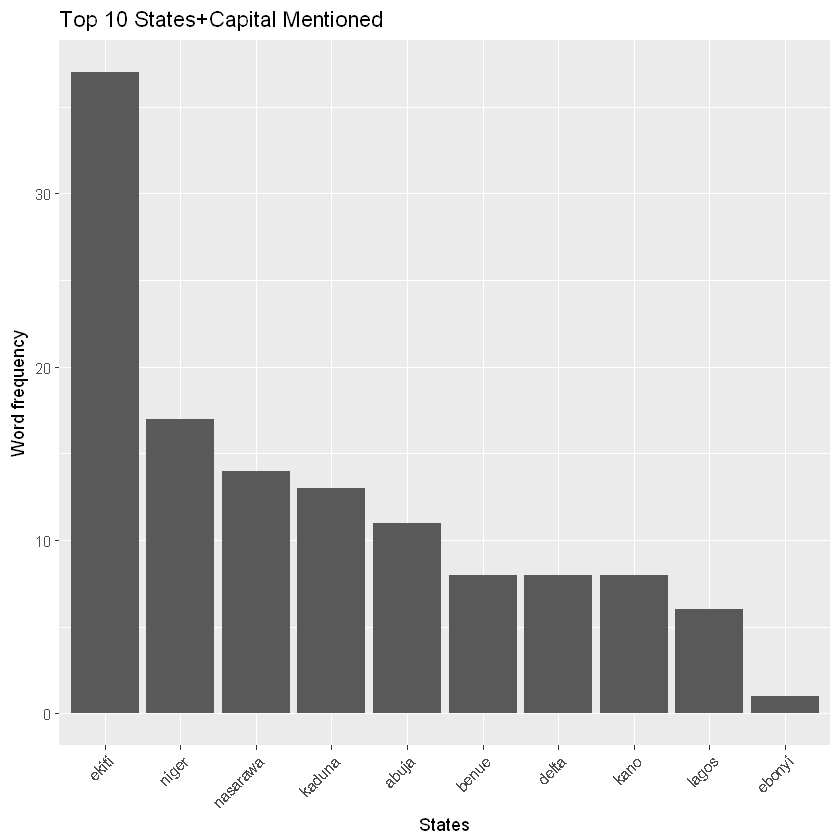

In [190]:
#barchart of word frequency
ggplot(subset(stateTermsDF), aes(x = reorder(word, -freq), y = freq)) + 
    geom_bar(stat = "identity") +  
    ggtitle("Top 10 States+Capital Mentioned") + 
    labs(x="States", y="Word frequency") + 
    theme(axis.text.x=element_text(angle=45, hjust=1))


In [196]:
#ekiti matrix
ekitiTerms <-  sort(colSums(as.matrix(buhariDTM[c(24,11,8),])), decreasing=TRUE)
#convert the terms matrix above to a dtaframe for plotting
ekitiTermsDF <- data.frame(word=names(ekitiTerms), freq=ekitiTerms)

In [191]:
#check works that occur at least 100s
buhariFreq <- findFreqTerms(buhariDTM, lowfreq = 100)
buhariFreq

[1] "government" "national"   "nigeria"    "people"     "state"     
[6] "will"       "country"

In [192]:
buhariFreq1 <- findFreqTerms(buhariDTM, lowfreq = 50)
buhariFreq1

[1] "administration" "can"            "corruption"     "development"   
 [5] "economic"       "federal"        "government"     "may"           
 [9] "must"           "national"       "nigeria"        "nigerian"      
[13] "nigerians"      "one"            "party"          "people"        
[17] "sector"         "state"          "states"         "support"       
[21] "thank"          "will"           "country"        "efforts"       
[25] "ensure"         "security"       "year"           "billion"       
[29] "naira"          "projects"       "budget"

## Bag of words analysis

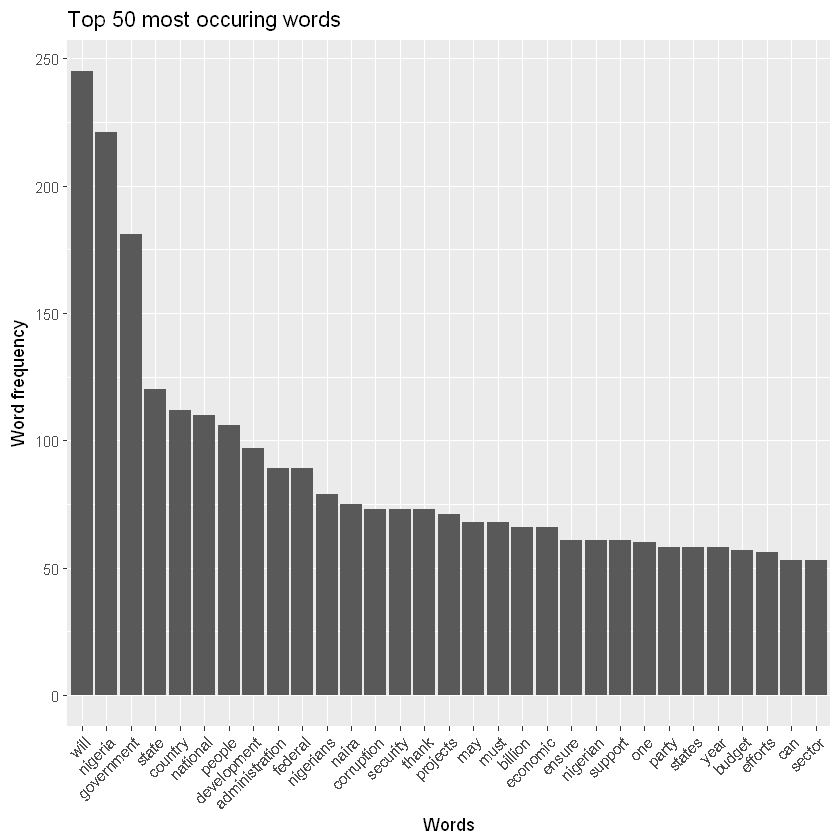

In [198]:
#barchart of word frequency
ggplot(subset(buhariTermsDF, freq>50), aes(x = reorder(word, -freq), y = freq)) + 
    geom_bar(stat = "identity") +  
    ggtitle("Top 50 most occuring words") + 
    labs(x="Words", y="Word frequency") + 
    theme(axis.text.x=element_text(angle=45, hjust=1))


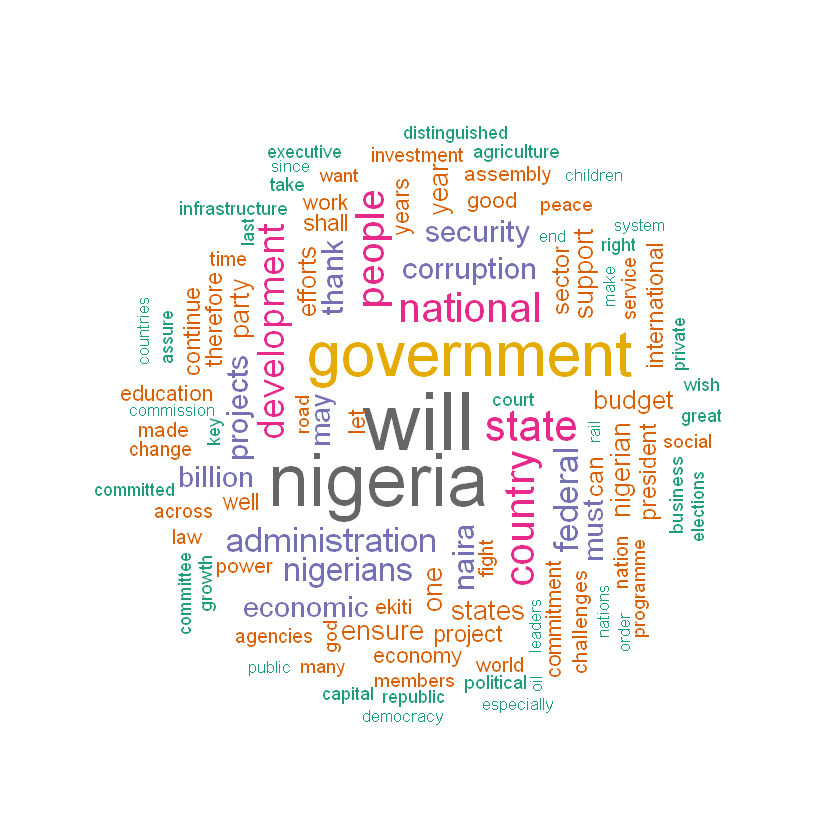

In [199]:
set.seed(2000)    
wordcloud(buhariTermsDF$word, buhariTermsDF$freq, min.freq = 25,
          max.words=200, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))

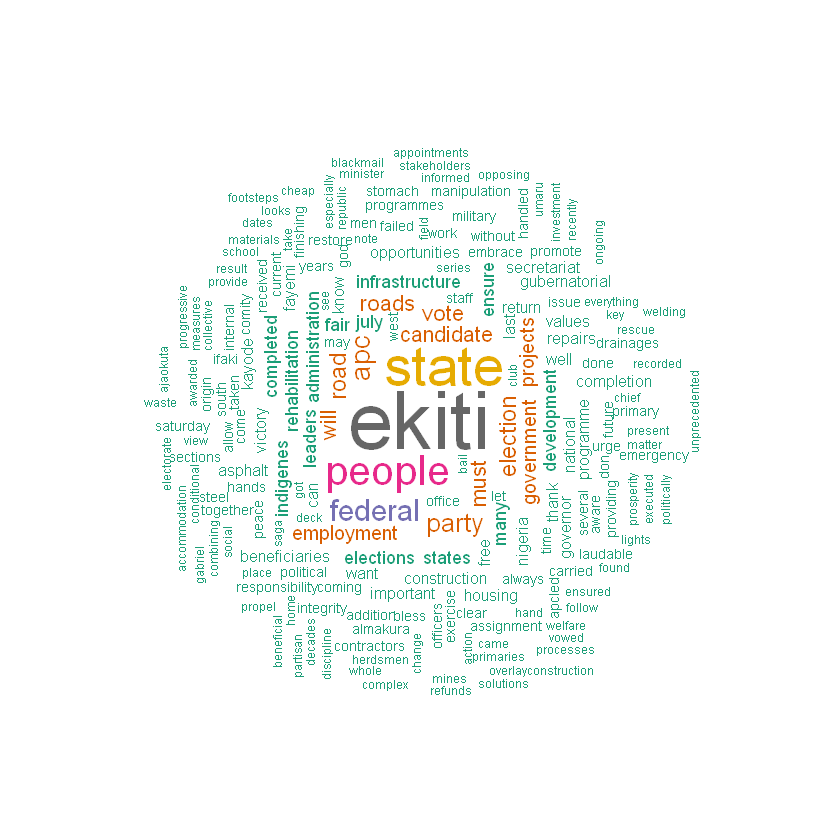

In [200]:
set.seed(2000)    
wordcloud(ekitiTermsDF$word, ekitiTermsDF$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))

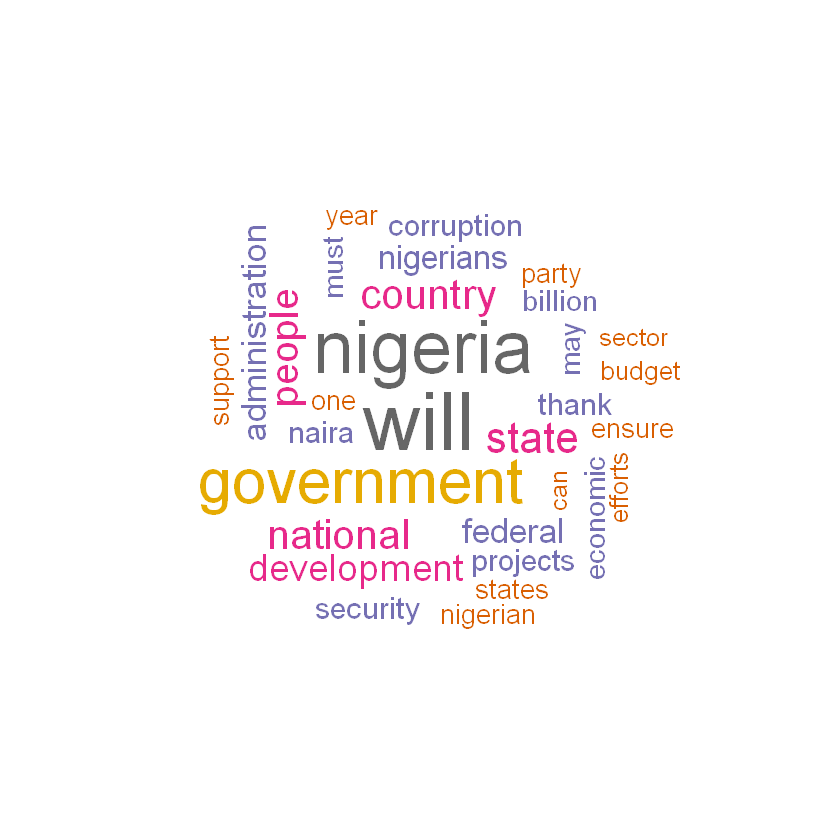

In [24]:
set.seed(200)    
wordcloud(buhariTermsDF$word, buhariTermsDF$freq, min.freq = 50,
          max.words=200, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))

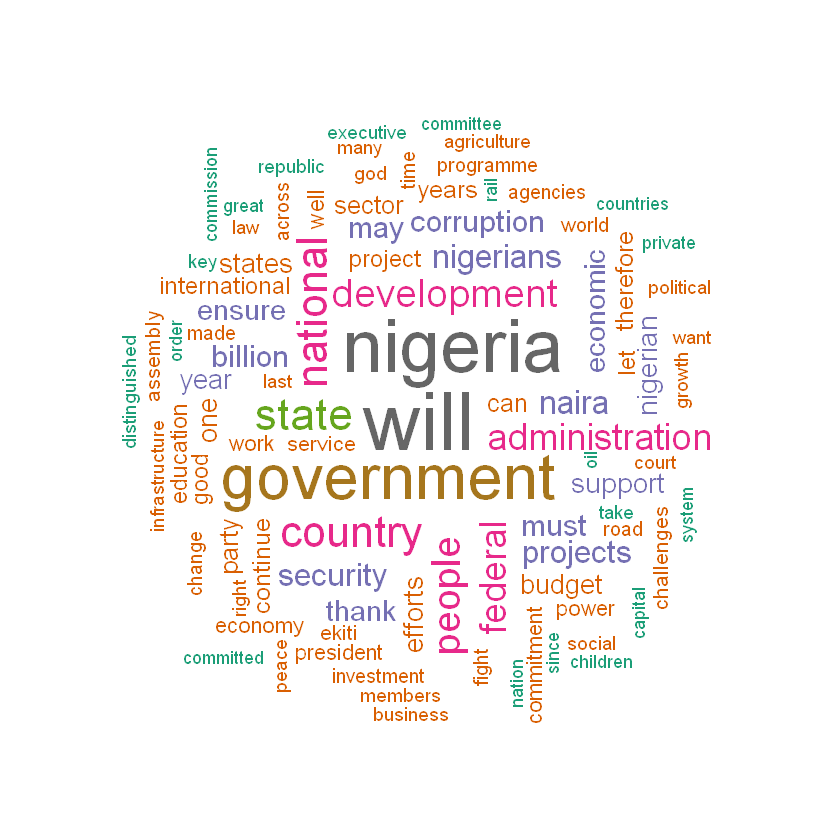

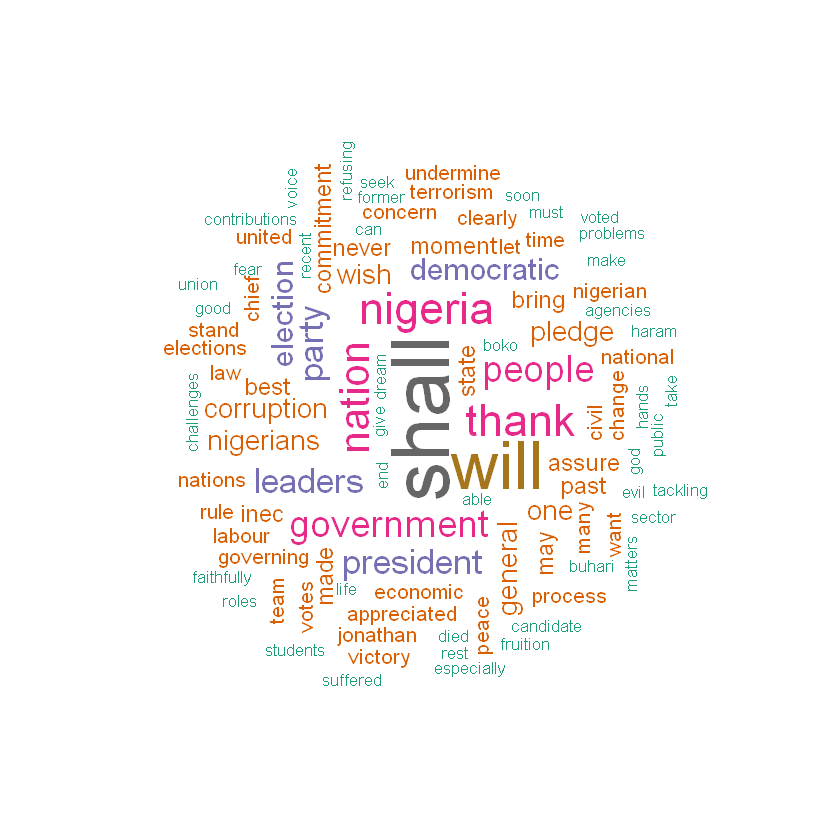

In [26]:
#word cloud
set.seed(12222) 
#par(mfrow=c(1,2)) #places chart side by side
wordcloud(NoInaugTermsDF$word, NoInaugTermsDF$freq, min.freq = 25,
          max.words=100, random.order=FALSE, rot.per=0.35,
            colors=brewer.pal(8, "Dark2"))
wordcloud(inaugTermsDF$word, inaugTermsDF$freq, min.freq = 25,
          max.words=100, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))


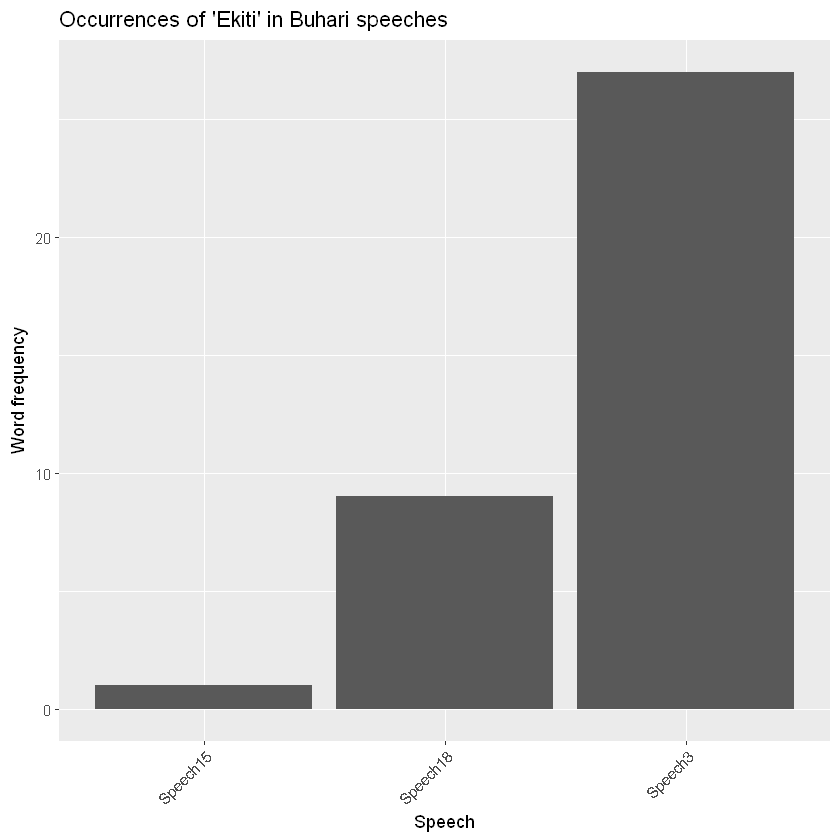

In [27]:
#find the occurence of certain words
df_buhari <- tidy(buhariDTM)
df_buhari %>% 
filter(term=="ekiti") %>%  
group_by(document) %>%  
ggplot(aes(x = document, y = count)) + 
    geom_bar(stat = "identity") +  
    ggtitle("Occurrences of 'Ekiti' in Buhari speeches") + 
    labs(x="Speech", y="Word frequency") + 
   theme(axis.text.x=element_text(angle=45, hjust=1)) 

In [ ]:
ggplot(subset(buhariTermsDF, freq>50), aes(x = reorder(word, -freq), y = freq)) + 
    geom_bar(stat = "identity") +  
    ggtitle("Top 50 most occuring words") + 
    labs(x="Words", y="Word frequency") + 
    theme(axis.text.x=element_text(angle=45, hjust=1))

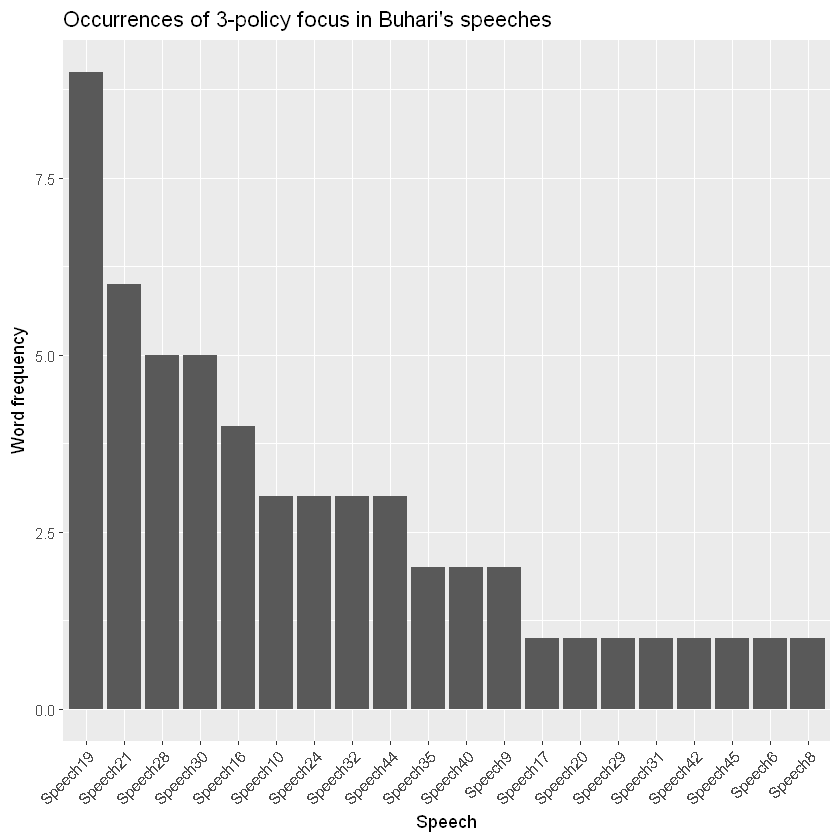

In [164]:
#find the occurence of certain words
df_buhari <- tidy(buhariDTM)
df_buhari %>% 
filter(term==c("corruption", "security", "economic")) %>%  
group_by(document) %>%  
ggplot(aes(x = reorder(document, -count), y = count)) + 
    geom_bar(stat = "identity") +  
    ggtitle("Occurrences of 3-policy focus in Buhari's speeches") + 
    labs(x="Speech", y="Word frequency") + 
   theme(axis.text.x=element_text(angle=45, hjust=1)) 
ggsave('policy.png', width=12, height=10)

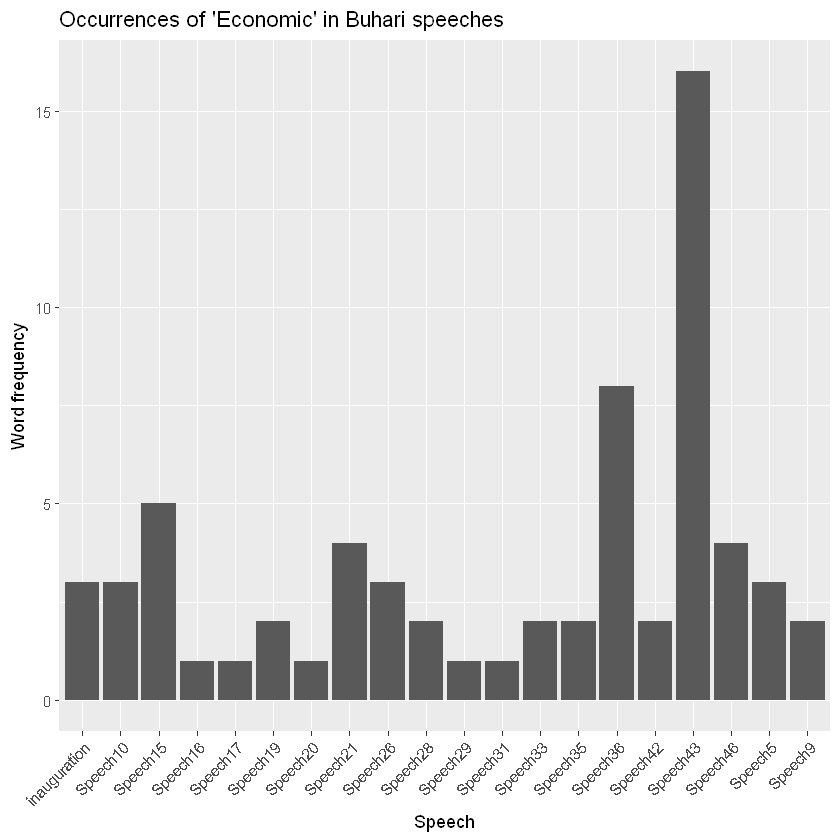

In [29]:
#find the occurence of certain words
df_buhari <- tidy(buhariDTM)
df_buhari %>% 
filter(term=="economic") %>%  
group_by(document) %>%  
ggplot(aes(x = document, y = count)) + 
    geom_bar(stat = "identity") +  
    ggtitle("Occurrences of 'Economic' in Buhari speeches") + 
    labs(x="Speech", y="Word frequency") + 
   theme(axis.text.x=element_text(angle=45, hjust=1)) 

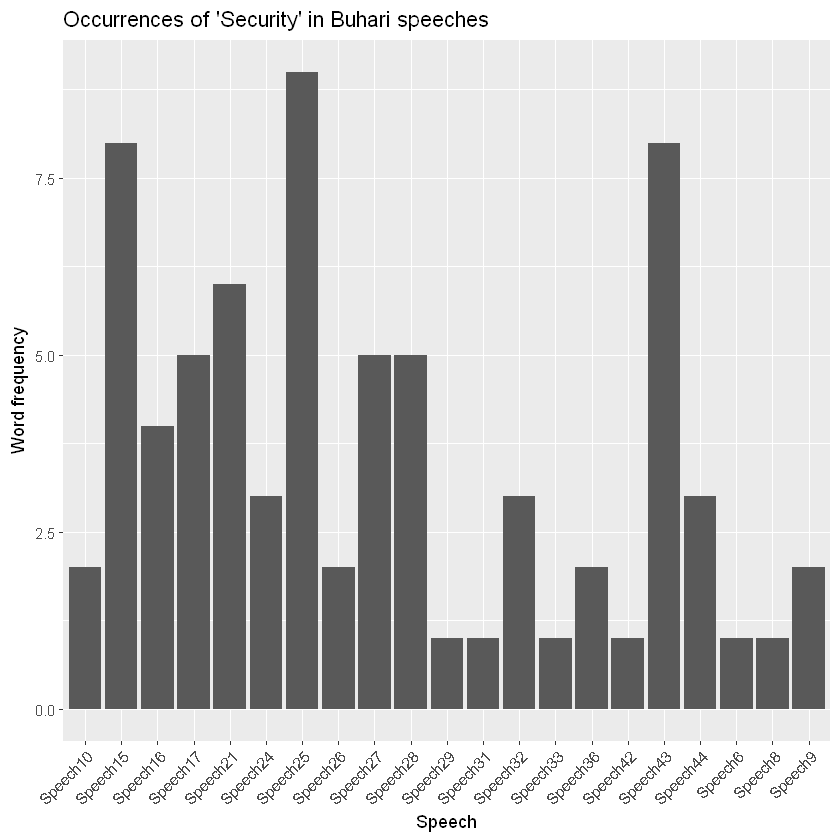

In [30]:
#find the occurence of certain words
df_buhari <- tidy(buhariDTM)
df_buhari %>% 
filter(term=="security") %>%  
group_by(document) %>%  
ggplot(aes(x = document, y = count)) + 
    geom_bar(stat = "identity") +  
    ggtitle("Occurrences of 'Security' in Buhari speeches") + 
    labs(x="Speech", y="Word frequency") + 
   theme(axis.text.x=element_text(angle=45, hjust=1)) 

## CLUSTERING

?hclust
The complete linkage method finds similar clusters. The single linkage method (which is closely related to the minimal spanning tree) adopts a ‘friends of friends’ clustering strategy. The other methods can be regarded as aiming for clusters with characteristics somewhere between the single and complete link methods.

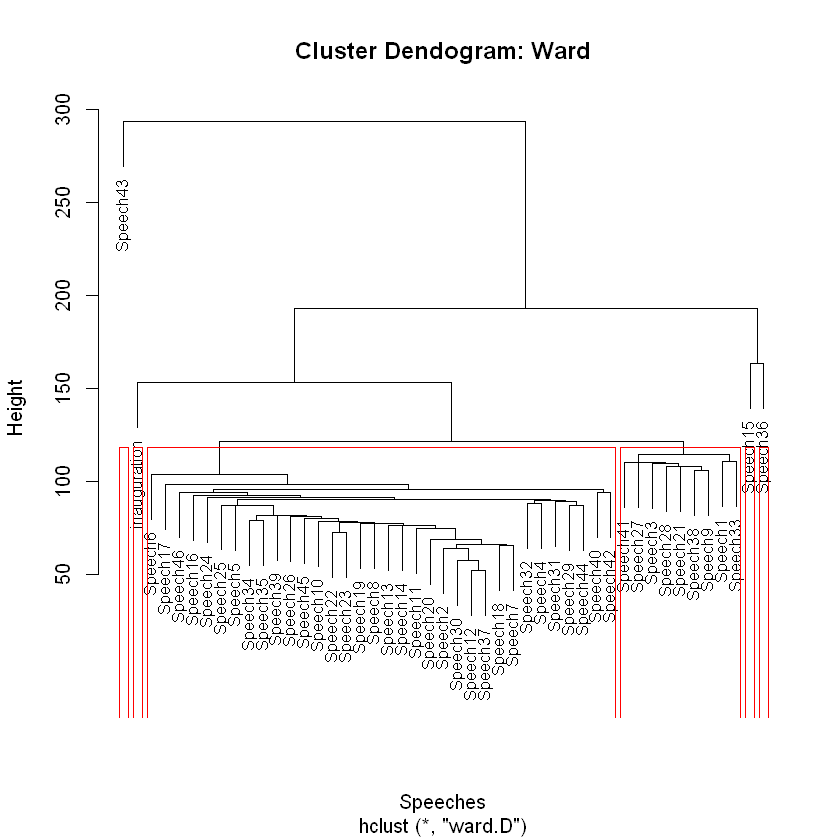

In [284]:
mat <- as.matrix(buhariDTM) #turn DTM into a matrix
docsdissim <- dist(scale(mat)) #calculate distance to create a dissimilarity matrix
h<-hclust(docsdissim, method = 'ward.D') #cluster usisng hiericichal ward.D/ward.D2/complete as the metric 
clustering <- cutree(h, 6)
#"ward.D", "ward.D2", "single", "complete", "average" (= UPGMA), "mcquitty" (= WPGMA), "median" (= WPGMC) or "centroid" (= UPGMC).
plot(h, cex=0.8, hang=0.1, main = "Cluster Dendogram: Ward", xlab = "Speeches", frame.plot=FALSE)
rect.hclust(h,6, border = "red")

In [286]:
cluster_summary <- data.frame(cluster = unique(clustering), size = as.numeric(table(clustering)))
cluster_summary

cluster,size
1,1
2,9
3,34
4,1
5,1
6,1


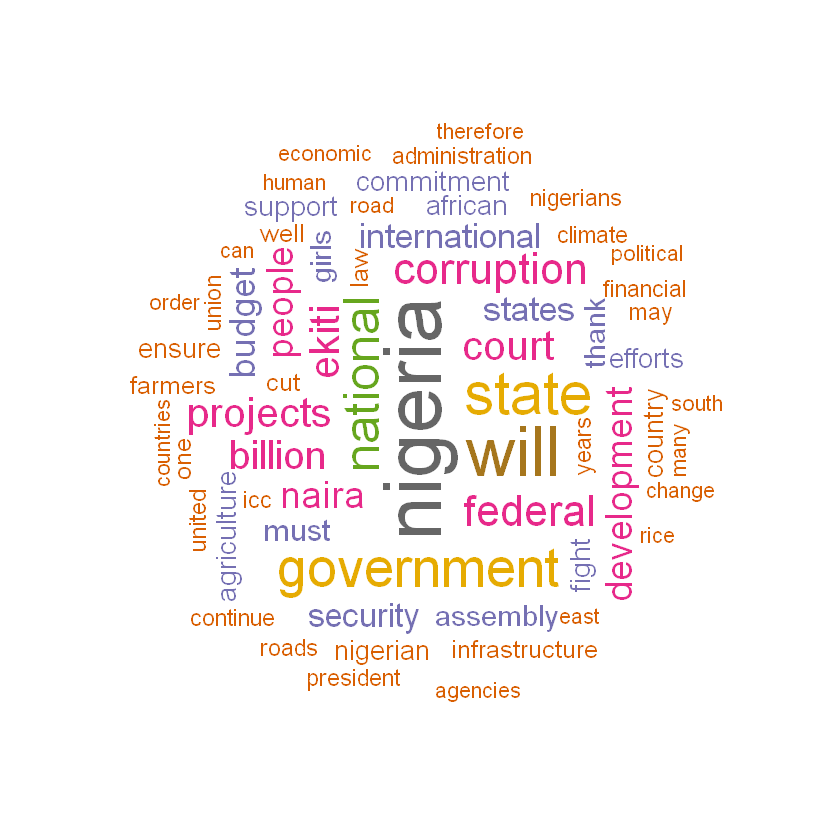

In [307]:
cluster2 <- mat[clustering ==2, ]
cluster2Terms <- sort(colSums(as.matrix(cluster2)), decreasing=TRUE)
cluster2TermsDF <- data.frame(word=names(cluster2Terms), freq=cluster2Terms)
wordcloud(cluster2TermsDF$word, cluster2TermsDF$freq, min.freq = 10,
          max.words=100, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))

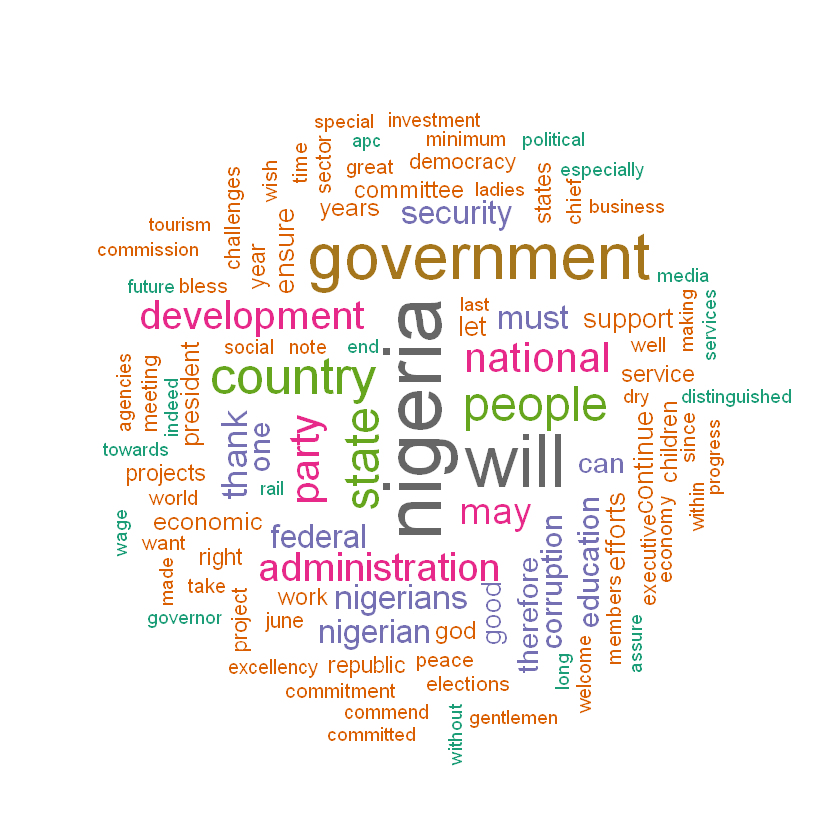

In [308]:
cluster3 <- mat[clustering ==3, ]
cluster3Terms <- sort(colSums(as.matrix(cluster3)), decreasing=TRUE)
cluster3TermsDF <- data.frame(word=names(cluster3Terms), freq=cluster3Terms)
wordcloud(cluster3TermsDF$word, cluster3TermsDF$freq, min.freq = 10,
          max.words=100, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))


## Co-occurence

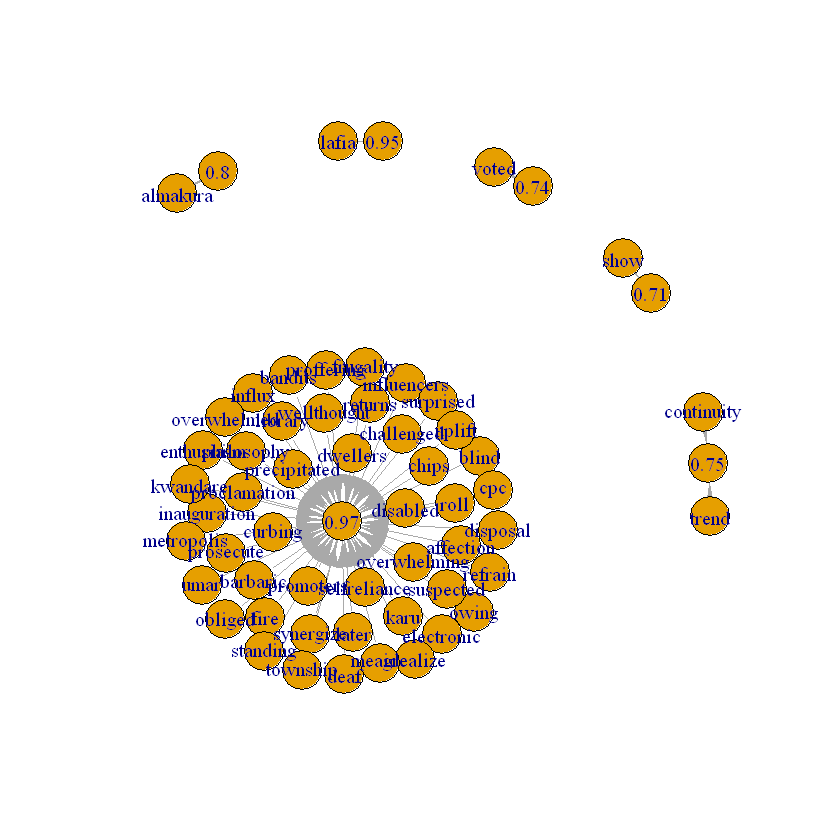

In [223]:
northern_state <- findAssocs(buhariDTM, c("nasarawa", "kaduna", "kano"), corlimit=0.7)[[1]]
northern_state<-cbind(read.table(text =names(northern_state),stringsAsFactors = FALSE), northern_state)
g<-graph.data.frame(northern_state,directed =TRUE)
#png('nas.png', width =1900, height = 700)
plot(g)
#dev.off()

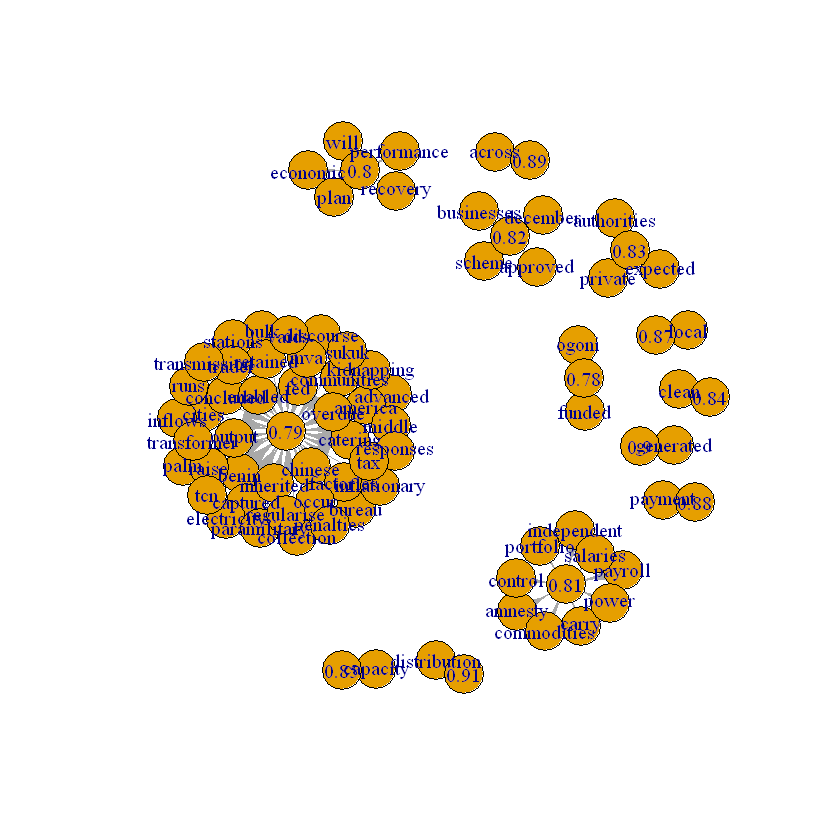

In [225]:
delta1 <- findAssocs(buhariDTM, c("niger", "delta"), corlimit=0.78)[[1]]
delta1<-cbind(read.table(text =names(delta1),stringsAsFactors = FALSE), delta1)
g<-graph.data.frame(delta1,directed =TRUE)
png('delta.png', width =1900, height = 700)
plot(g)
dev.off()

# 